# Regression

## Setup

In [167]:
library(feather)
library(tidyverse)
library(viridis)
library(broom)
library(lubridate)
library(entropy)
library(caret)
library(factoextra)

In [168]:
df_name <- "macaco"
df_type <- "next_cell"
df_path <- paste("/data/users_data/douglas/data/", df_name, "_tsas_", df_type, ".tsv", sep = "")

In [169]:
df <- read_tsv(df_path, guess_max = 100000)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  device_id = col_character(),
  timestamp = col_datetime(format = "")
)
i<U+00A0>Use `spec()` for the full column specifications.



In [170]:
# Compute weekday and hour of day as separate columns.
df <- df %>%
    mutate(wd = as.factor(wday(timestamp)), hd = as.factor(hour(timestamp)))

In [171]:
# Change device_ids to start from one.
all_levels = unique(c(as.character(df$device_id)))
df <- df %>%
    mutate(device_id = as.numeric(factor(df$device_id, levels=all_levels)))

In [172]:
head(df)

measurement_id,device_id,timestamp,grid_id,grid_id300,grid_id400,grid_id500,grid_id600,grid_id700,grid_id800,⋯,entropy_seq_split_weekday,entropy_seq_merge_weekday,predictability_seq_split_weekday,predictability_seq_merge_weekday,entropy_seq_split_hourofday,entropy_seq_merge_hourofday,predictability_seq_split_hourofday,predictability_seq_merge_hourofday,wd,hd
<dbl>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
434778,1,2015-03-17 11:06:42,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434782,1,2015-03-17 11:10:43,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434783,1,2015-03-17 11:11:11,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434785,1,2015-03-17 11:13:11,1843850253,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434805,1,2015-03-17 11:19:06,1843850253,819515606,460961561,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11
434808,1,2015-03-17 11:21:11,1843891497,819515606,460961560,295014247,204885107,150527670,115245044,⋯,0.4487424,0.4250529,0.953,0.956,0.6196407,0.6965125,0.931,0.92,3,11


In [173]:
colnames(df)

[1] "measurement_id"                     "device_id"                         
 [3] "timestamp"                          "grid_id"                           
 [5] "grid_id300"                         "grid_id400"                        
 [7] "grid_id500"                         "grid_id600"                        
 [9] "grid_id700"                         "grid_id800"                        
[11] "grid_id900"                         "grid_id1000"                       
[13] "regularity"                         "stationarity"                      
[15] "diversity"                          "regularity300"                     
[17] "stationarity300"                    "diversity300"                      
[19] "regularity400"                      "stationarity400"                   
[21] "diversity400"                       "regularity500"                     
[23] "stationarity500"                    "diversity500"                      
[25] "regularity600"                      "stationarity600"                   
[27] "diversity600"                       "regularity700"                     
[29] "stationarity700"                    "diversity700"                      
[31] "regularity800"                      "stationarity800"                   
[33] "diversity800"                       "regularity900"                     
[35] "stationarity900"                    "diversity900"                      
[37] "regularity1000"                     "stationarity1000"                  
[39] "diversity1000"                      "baseline_entropy"                  
[41] "actual_entropy"                     "baseline_predictability"           
[43] "actual_predictability"              "baseline_entropy300"               
[45] "actual_entropy300"                  "baseline_predictability300"        
[47] "actual_predictability300"           "baseline_entropy400"               
[49] "actual_entropy400"                  "baseline_predictability400"        
[51] "actual_predictability400"           "baseline_entropy500"               
[53] "actual_entropy500"                  "baseline_predictability500"        
[55] "actual_predictability500"           "baseline_entropy600"               
[57] "actual_entropy600"                  "baseline_predictability600"        
[59] "actual_predictability600"           "baseline_entropy700"               
[61] "actual_entropy700"                  "baseline_predictability700"        
[63] "actual_predictability700"           "baseline_entropy800"               
[65] "actual_entropy800"                  "baseline_predictability800"        
[67] "actual_predictability800"           "baseline_entropy900"               
[69] "actual_entropy900"                  "baseline_predictability900"        
[71] "actual_predictability900"           "baseline_entropy1000"              
[73] "actual_entropy1000"                 "baseline_predictability1000"       
[75] "actual_predictability1000"          "entropy_seq_split_weekday"         
[77] "entropy_seq_merge_weekday"          "predictability_seq_split_weekday"  
[79] "predictability_seq_merge_weekday"   "entropy_seq_split_hourofday"       
[81] "entropy_seq_merge_hourofday"        "predictability_seq_split_hourofday"
[83] "predictability_seq_merge_hourofday" "wd"                                
[85] "hd"

# Regression

In [174]:
normalize <- function(x){ return((x-min(x)) / (max(x)-min(x))) }
zscore <- function(x, na.rm = TRUE) (x - mean(x, na.rm = TRUE)) / sd(x, na.rm = TRUE)

df_regression <- df %>%
    group_by(device_id) %>%
    filter(n() > 42) %>%
    summarise(
             n = n(),
             n_unique = n_distinct(grid_id),
             regularity = mean(regularity),
             diversity = mean(diversity),
             stationarity = if_else(df_type == "next_place", 0.0, mean(stationarity)),
             entropy = mean(actual_entropy),
             predictability = mean(actual_predictability)
    )  %>%
    mutate_at(c("predictability"), normalize)

In [175]:
head(df_regression)

device_id,n,n_unique,regularity,diversity,stationarity,entropy,predictability
<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,5501,14,99.75,0.9856912,76.80,0.3219106,0.744
2,826,24,97.09,0.8298321,91.52,0.1809740,0.880
3,5551,342,93.84,0.9883172,84.20,0.3924311,0.792
4,4253,100,97.65,0.9703378,89.25,0.2170638,0.880
5,199,3,98.49,0.6377889,96.97,0.3899636,0.512
6,2717,125,95.40,0.9854683,77.21,0.6145410,0.616


In [176]:
df_regression %>%
    select(n, n_unique, regularity, stationarity, diversity, entropy) %>%
    cor(use="complete.obs", method="spearman") 

,n,n_unique,regularity,stationarity,diversity,entropy
n,1.00000000,0.6980324,0.06803549,-0.2232446,0.7196192,-0.04865151
n_unique,0.69803239,1.0000000,-0.55347060,-0.4010156,0.7094309,0.20760606
regularity,0.06803549,-0.5534706,1.00000000,0.4981226,-0.2735963,-0.47693589
stationarity,-0.22324462,-0.4010156,0.49812259,1.0000000,-0.7295178,-0.84178797
diversity,0.71961925,0.7094309,-0.27359626,-0.7295178,1.0000000,0.59333686
entropy,-0.04865151,0.2076061,-0.47693589,-0.8417880,0.5933369,1.00000000


In [177]:
if (df_type == "next_cell") {
    fmla_m1 <- as.formula("entropy ~ regularity")
    fmla_m2 <- as.formula("entropy ~ stationarity")
    fmla_m3 <- as.formula("entropy ~ stationarity + regularity")

    fmla_m4 <- as.formula("entropy ~ diversity")
    fmla_m5 <- as.formula("entropy ~ stationarity + regularity + diversity")
} else {
    fmla_m1 <- as.formula("entropy ~ regularity")
    fmla_m2 <- as.formula("entropy ~ diversity")
    fmla_m3 <- as.formula("entropy ~ regularity + diversity")

    fmla_m4 <- as.formula("entropy ~ diversity")
    fmla_m5 <- as.formula("entropy ~ regularity + diversity")
}

In [178]:
m1 <- lm(fmla_m1, data = df_regression, na.action=na.exclude)
df_regression$predictions_m1 <- predict(m1)

m2 <- lm(fmla_m2, data = df_regression, na.action=na.exclude)
df_regression$predictions_m2 <- predict(m2)

m3 <- lm(fmla_m3, data = df_regression, na.action=na.exclude)
df_regression$predictions_m3 <- predict(m3)

m4 <- lm(fmla_m4, data = df_regression, na.action=na.exclude)
df_regression$predictions_m4 <- predict(m4)

m5 <- lm(fmla_m5, data = df_regression, na.action=na.exclude)
df_regression$predictions_m5 <- predict(m5)

In [179]:
MAPE <- function(predicted, actual) {
    mean(abs((actual-predicted)/actual) * 100)
}

In [180]:
sigma(m1) / mean(df_regression$entropy)
RMSE(df_regression$predictions_m1, df_regression$entropy)
cat("\n\n=======================\n\n")
summary(m1)
cat("\n\n=======================\n\n")
print(tidy(m1))
cat("\n\n=======================\n\n")
print(glance(m1))
cat("\n\n=======================\n\n")
coef(summary(m1))[, c("t value","Pr(>|t|)")]

[1] 0.5363326

[1] 0.1794763


Call:
lm(formula = fmla_m1, data = df_regression, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24276 -0.13563 -0.05191  0.06435  0.50764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.968954   0.686597   5.781 2.98e-07 ***
regularity  -0.037779   0.007144  -5.288 1.89e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1825 on 59 degrees of freedom
Multiple R-squared:  0.3216,	Adjusted R-squared:  0.3101 
F-statistic: 27.96 on 1 and 59 DF,  p-value: 1.891e-06





# A tibble: 2 x 5
  term        estimate std.error statistic     p.value
  <chr>          <dbl>     <dbl>     <dbl>       <dbl>
1 (Intercept)   3.97     0.687        5.78 0.000000298
2 regularity   -0.0378   0.00714     -5.29 0.00000189 



# A tibble: 1 x 12
  r.squared adj.r.squared sigma statistic    p.value    df logLik   AIC   BIC
      <dbl>         <dbl> <dbl>     <dbl>      <dbl> <dbl>  <dbl> <dbl> <dbl>
1     0.322         0.310 0.182      28.0 0.00000189     1   18.2 -30.5 -24.1
# ... with 3 more variables: deviance <dbl>, df.residual <int>, nobs <int>





,t value,Pr(>|t|)
(Intercept),5.780615,2.981522e-07
regularity,-5.288103,1.891134e-06


In [181]:
sigma(m2) / mean(df_regression$entropy)
RMSE(df_regression$predictions_m2, df_regression$entropy)
cat("\n\n=======================\n\n")
summary(m2)
cat("\n\n=======================\n\n")
print(tidy(m2))
cat("\n\n=======================\n\n")
print(glance(m2))
cat("\n\n=======================\n\n")
coef(summary(m2))[, c("t value","Pr(>|t|)")]

[1] 0.3170174

[1] 0.1060855


Call:
lm(formula = fmla_m2, data = df_regression, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.30089 -0.07170 -0.01871  0.05151  0.35803 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.476096   0.155601   15.91   <2e-16 ***
stationarity -0.024132   0.001751  -13.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1079 on 59 degrees of freedom
Multiple R-squared:  0.763,	Adjusted R-squared:  0.7589 
F-statistic: 189.9 on 1 and 59 DF,  p-value: < 2.2e-16





# A tibble: 2 x 5
  term         estimate std.error statistic  p.value
  <chr>           <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)    2.48     0.156        15.9 5.15e-23
2 stationarity  -0.0241   0.00175     -13.8 4.25e-20



# A tibble: 1 x 12
  r.squared adj.r.squared sigma statistic  p.value    df logLik   AIC   BIC
      <dbl>         <dbl> <dbl>     <dbl>    <dbl> <dbl>  <dbl> <dbl> <dbl>
1     0.763         0.759 0.108      190. 4.25e-20     1   50.3 -94.6 -88.3
# ... with 3 more variables: deviance <dbl>, df.residual <int>, nobs <int>





,t value,Pr(>|t|)
(Intercept),15.91314,5.149021e-23
stationarity,-13.78078,4.247478e-20


In [182]:
sigma(m3) / mean(df_regression$entropy)
RMSE(df_regression$predictions_m3, df_regression$entropy)
cat("\n\n=======================\n\n")
summary(m3)
cat("\n\n=======================\n\n")
print(tidy(m3))
cat("\n\n=======================\n\n")
print(glance(m3))
cat("\n\n=======================\n\n")
coef(summary(m3))[, c("t value","Pr(>|t|)")]

[1] 0.31491

[1] 0.1044834


Call:
lm(formula = fmla_m3, data = df_regression, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25669 -0.07742 -0.00830  0.04110  0.32294 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.989577   0.413520   7.230 1.21e-09 ***
stationarity -0.022516   0.002117 -10.637 3.00e-15 ***
regularity   -0.006834   0.005105  -1.339    0.186    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1072 on 58 degrees of freedom
Multiple R-squared:  0.7701,	Adjusted R-squared:  0.7621 
F-statistic: 97.13 on 2 and 58 DF,  p-value: < 2.2e-16





# A tibble: 3 x 5
  term         estimate std.error statistic  p.value
  <chr>           <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   2.99      0.414        7.23 1.21e- 9
2 stationarity -0.0225    0.00212    -10.6  3.00e-15
3 regularity   -0.00683   0.00510     -1.34 1.86e- 1



# A tibble: 1 x 12
  r.squared adj.r.squared sigma statistic  p.value    df logLik   AIC   BIC
      <dbl>         <dbl> <dbl>     <dbl>    <dbl> <dbl>  <dbl> <dbl> <dbl>
1     0.770         0.762 0.107      97.1 3.06e-19     2   51.2 -94.5 -86.0
# ... with 3 more variables: deviance <dbl>, df.residual <int>, nobs <int>





,t value,Pr(>|t|)
(Intercept),7.229589,1.205748e-09
stationarity,-10.636657,2.998582e-15
regularity,-1.338770,1.858693e-01


In [183]:
sigma(m4) / mean(df_regression$entropy)
RMSE(df_regression$predictions_m4, df_regression$entropy)
cat("\n\n=======================\n\n")
summary(m4)
cat("\n\n=======================\n\n")
print(tidy(m4))
cat("\n\n=======================\n\n")
print(glance(m4))
cat("\n\n=======================\n\n")
coef(summary(m4))[, c("t value","Pr(>|t|)")]

[1] 0.5891498

[1] 0.1971509


Call:
lm(formula = fmla_m4, data = df_regression, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29436 -0.14361 -0.02785  0.06014  0.69112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.0468     0.1101  -0.425 0.672306    
diversity     0.4456     0.1233   3.615 0.000622 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2005 on 59 degrees of freedom
Multiple R-squared:  0.1814,	Adjusted R-squared:  0.1675 
F-statistic: 13.07 on 1 and 59 DF,  p-value: 0.0006222





# A tibble: 2 x 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)  -0.0468     0.110    -0.425 0.672   
2 diversity     0.446      0.123     3.62  0.000622



# A tibble: 1 x 12
  r.squared adj.r.squared sigma statistic  p.value    df logLik   AIC   BIC
      <dbl>         <dbl> <dbl>     <dbl>    <dbl> <dbl>  <dbl> <dbl> <dbl>
1     0.181         0.167 0.200      13.1 0.000622     1   12.5 -19.0 -12.7
# ... with 3 more variables: deviance <dbl>, df.residual <int>, nobs <int>





,t value,Pr(>|t|)
(Intercept),-0.4251059,0.6723059548
diversity,3.6152946,0.0006222334


In [184]:
sigma(m5) / mean(df_regression$entropy)
RMSE(df_regression$predictions_m5, df_regression$entropy)
cat("\n\n=======================\n\n")
summary(m5)
cat("\n\n=======================\n\n")
print(tidy(m5))
cat("\n\n=======================\n\n")
print(glance(m5))
cat("\n\n=======================\n\n")
coef(summary(m5))[, c("t value","Pr(>|t|)")]

[1] 0.3175701

[1] 0.1044538


Call:
lm(formula = fmla_m5, data = df_regression, na.action = na.exclude)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25744 -0.07699 -0.00744  0.04061  0.32143 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.015246   0.440741   6.841 5.85e-09 ***
stationarity -0.022708   0.002385  -9.521 2.20e-13 ***
regularity   -0.006800   0.005152  -1.320    0.192    
diversity    -0.013831   0.076869  -0.180    0.858    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1081 on 57 degrees of freedom
Multiple R-squared:  0.7702,	Adjusted R-squared:  0.7581 
F-statistic: 63.68 on 3 and 57 DF,  p-value: < 2.2e-16





# A tibble: 4 x 5
  term         estimate std.error statistic  p.value
  <chr>           <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)   3.02      0.441       6.84  5.85e- 9
2 stationarity -0.0227    0.00239    -9.52  2.20e-13
3 regularity   -0.00680   0.00515    -1.32  1.92e- 1
4 diversity    -0.0138    0.0769     -0.180 8.58e- 1



# A tibble: 1 x 12
  r.squared adj.r.squared sigma statistic  p.value    df logLik   AIC   BIC
      <dbl>         <dbl> <dbl>     <dbl>    <dbl> <dbl>  <dbl> <dbl> <dbl>
1     0.770         0.758 0.108      63.7 3.38e-18     3   51.2 -92.5 -81.9
# ... with 3 more variables: deviance <dbl>, df.residual <int>, nobs <int>





,t value,Pr(>|t|)
(Intercept),6.8413044,5.846626e-09
stationarity,-9.5210622,2.201620e-13
regularity,-1.3200235,1.921039e-01
diversity,-0.1799251,8.578495e-01


In [185]:
predslm <- predict(m3, interval = "confidence")
df_plot <- cbind(df_regression, predslm)


In [186]:
predslm <- predict(m5, interval = "confidence")
df_plot <- cbind(df_regression, predslm)

Saving 6.67 x 6.67 in image


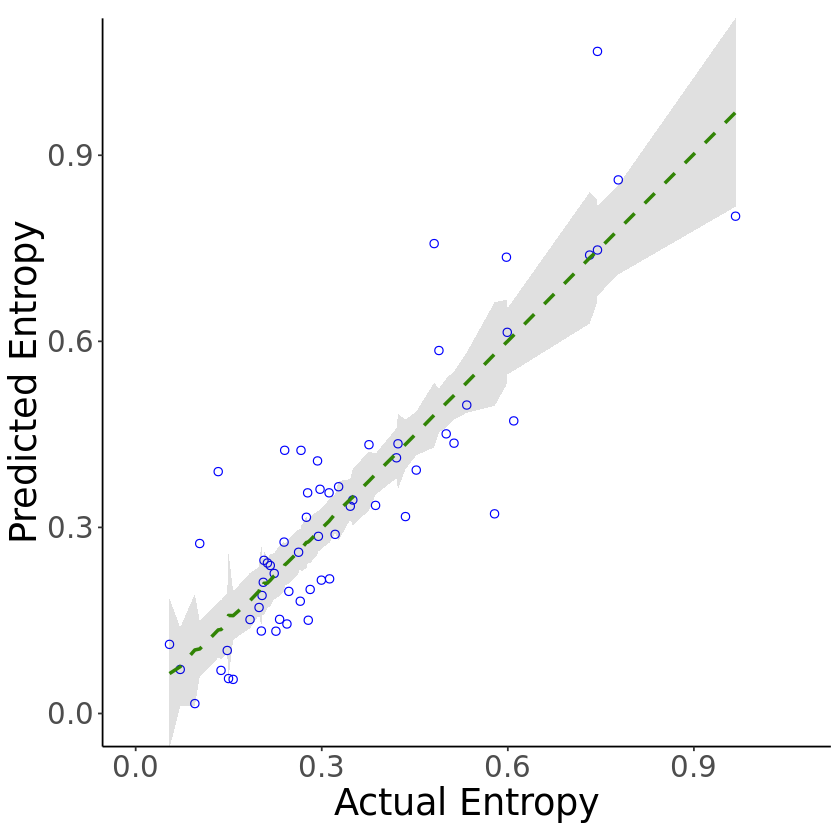

In [187]:
max_lim <- max(max(df_regression$entropy), max(df_regression$predictions_m3))

if (df_name == "macaco") {
    alpha_ratio <- 1.0
    pt_size <- 2
} else {
    alpha_ratio <- 0.7
    pt_size <- 1.0
}


ggplot(df_plot, aes(x = predictions_m3, y = entropy)) +
    geom_point(shape = 1, alpha = alpha_ratio, colour = 'blue', size = pt_size, position="jitter") +
    geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = .15) +
    geom_line(aes(y = fit), col = "#318405", linetype = "dashed", size = 1.0) +
    #geom_point(data=df_outliers, shape=8, size=2, color = 'red') +
  coord_equal(xlim=c(0, max_lim), ylim=c(0, max_lim)) +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.98, 0.01)) +
  labs(y = "Predicted Entropy", x = "Actual Entropy")

    prefix <- "images/RegressionBest"
    fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
    ggsave(plot=last_plot(), filename = fname, device = "pdf")
    embedFonts(fname)



Saving 6.67 x 6.67 in image


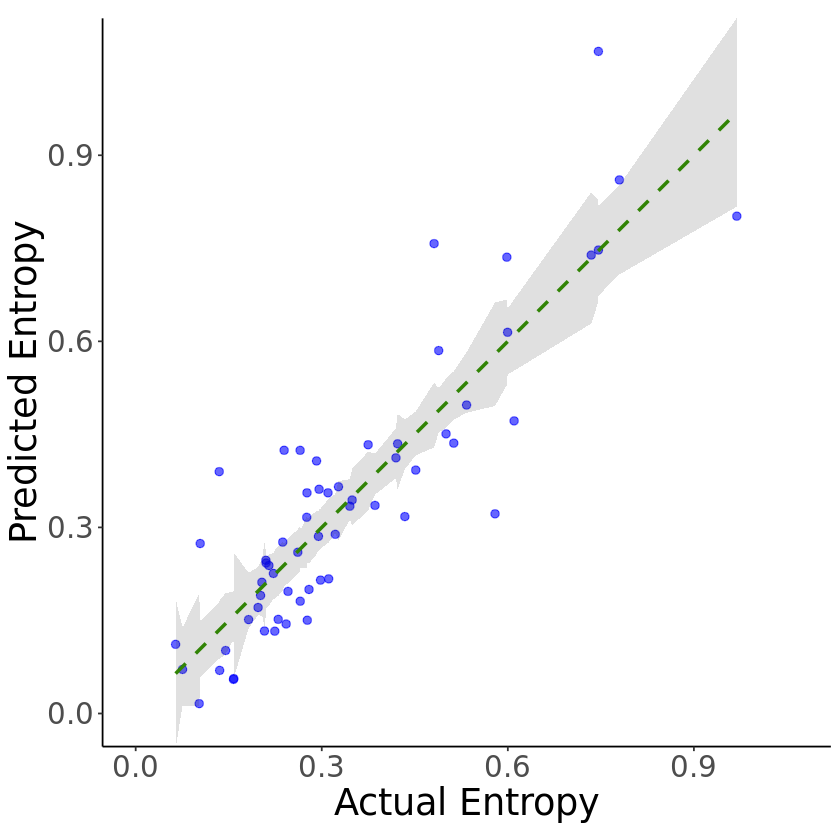

In [188]:
max_lim <- max(max(df_regression$entropy), max(df_regression$predictions_m5))

if (df_name == "macaco") {
    shp <- 19
    alpha_ratio <- 0.6
    pt_size <- 2
} else {
    shp <- 1
    alpha_ratio <- 0.7
    pt_size <- 1.0
}


ggplot(df_plot, aes(x = predictions_m5, y = entropy)) +
    geom_point(shape = shp, alpha = alpha_ratio, colour = 'blue', size = pt_size, position="jitter") +
    geom_ribbon(aes(ymin = lwr, ymax = upr), alpha = .15) +
    geom_line(aes(y = fit), col = "#318405", linetype = "dashed", size = 1.0) +
    #geom_point(data=df_outliers, shape=8, size=2, color = 'red') +
  coord_equal(xlim=c(0, max_lim), ylim=c(0, max_lim)) +
  theme_classic() +
  theme(plot.title = element_text(hjust = 0.5), 
        text = element_text(size=22),
        legend.justification = c(1, 0.01),
        legend.position = c(0.98, 0.01)) +
  labs(y = "Predicted Entropy", x = "Actual Entropy")

    prefix <- "images/RegressionBestAllMetrics"
    fname <- paste(prefix, df_name, df_type, ".pdf", sep="_")
    ggsave(plot=last_plot(), filename = fname, device = "pdf")
    embedFonts(fname)

